In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
from plot_config import *
from utils import *

In [3]:
bins = 50
b = slice(None,None,bins)
bb= (b,b)

In [4]:
ds4 = open_domain4()
dsa = open_domain_all()

In [20]:
just_for_time = '/sciserver/filedb10-01/ocean/wenrui_temp/vol_budget'

rtime = np.array(xr.open_zarr(just_for_time).time)
ptime = np.linspace(0,3655,3650)/365
salty_time = rtime[salty_idate - np.arange(len(ptime))]
fresh_time = rtime[fresh_idate - np.arange(len(ptime))]

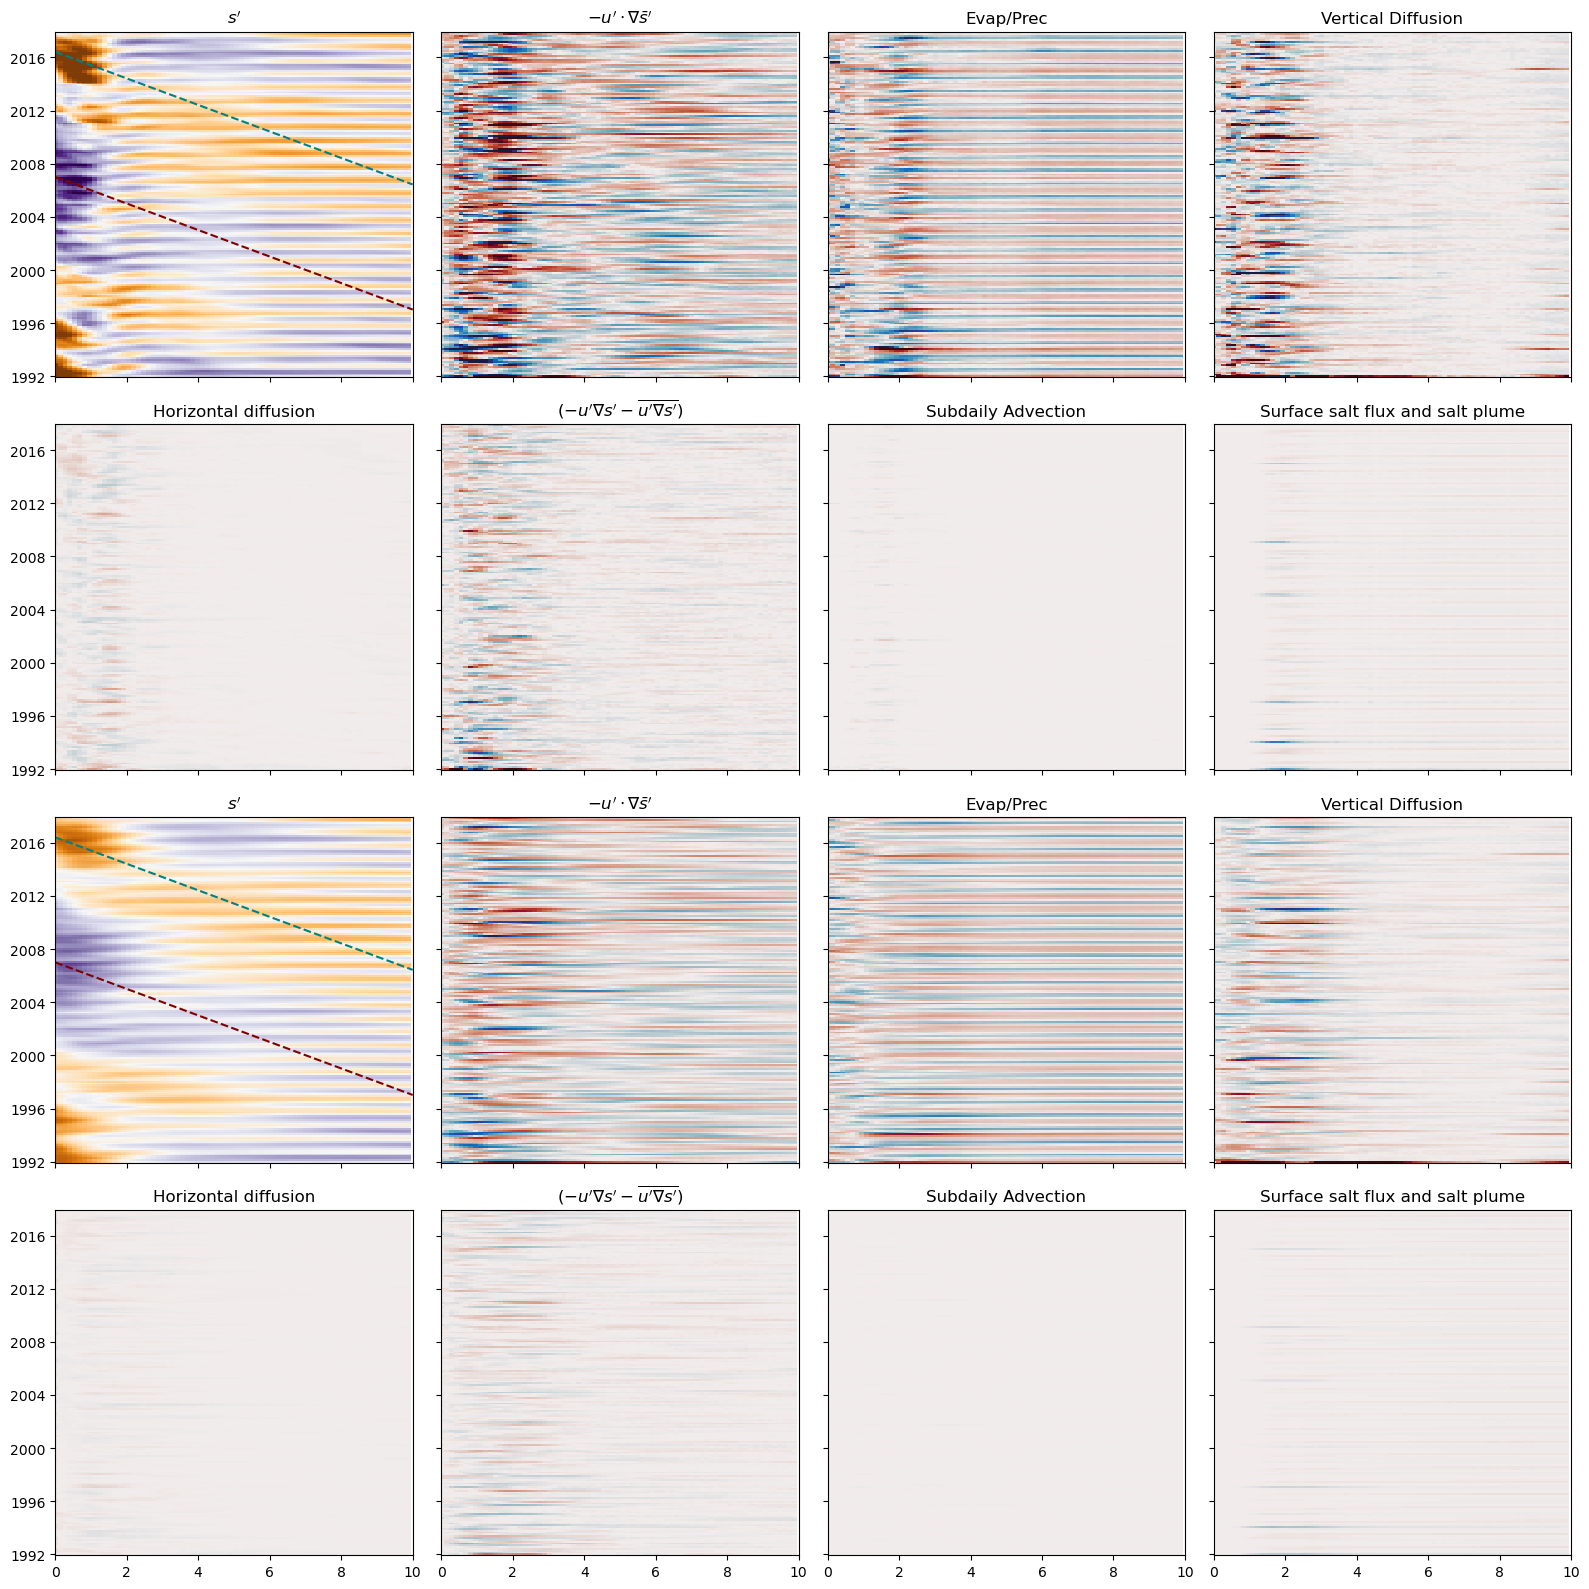

In [23]:
fig,axs = plt.subplots(4,4, figsize = (16,16),sharex = True,sharey = True,subplot_kw={'xlim':(0,10)})
axs = axs.ravel()
order = ['sf']+ rhs_list
titles = [r"$s'$"]+[term_dic[i] for i in rhs_list]
for i,var in enumerate(order):
    if 's' in var:
        vmax = 0.15
        cmap = s_cmap
        ratio4 = 1
        ratioa = 1
        axs[i].plot(ptime,salty_time,'--', color = salty_theme_color)
        axs[i].plot(ptime,fresh_time,'--', color = fresh_theme_color)
        axs[i+8].plot(ptime,salty_time,'--', color = salty_theme_color)
        axs[i+8].plot(ptime,fresh_time,'--', color = fresh_theme_color)
    else:
        vmax = 0.002
        cmap = term_cmap
        ratio4 = 1/NUMBER_OF_PARTICLE_domain4
        ratioa = 1/NUMBER_OF_PARTICLE_domain_all
    axs[i].pcolormesh(ptime[b],rtime[b],-ds4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap)
    axs[i+8].pcolormesh(ptime[b],rtime[b],-dsa[var][bb]*ratioa,vmax = vmax, vmin = -vmax, cmap = cmap)
    axs[i].set_title(titles[i])
    axs[i+8].set_title(titles[i])
plt.tight_layout()
plt.savefig('figure8.png')